# Importing libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
import folium
from folium.plugins import HeatMap
import plotly.express as px

# Combining all dataset of all months

In [2]:
df_april = pd.read_csv(r'C:\Users\ADMIN\Python\Ml projects\Uber Analysis\Dataset\uber-raw-data-apr14.csv')
df_may = pd.read_csv(r'C:\Users\ADMIN\Python\Ml projects\Uber Analysis\Dataset\uber-raw-data-may14.csv')
df_june = pd.read_csv(r'C:\Users\ADMIN\Python\Ml projects\Uber Analysis\Dataset\uber-raw-data-jun14.csv')
df_july = pd.read_csv(r'C:\Users\ADMIN\Python\Ml projects\Uber Analysis\Dataset\uber-raw-data-jul14.csv')
df_aug = pd.read_csv(r'C:\Users\ADMIN\Python\Ml projects\Uber Analysis\Dataset\uber-raw-data-aug14.csv')
df_sept = pd.read_csv(r'C:\Users\ADMIN\Python\Ml projects\Uber Analysis\Dataset\uber-raw-data-sep14.csv')

# Concatenating Files Apr-Sept, 2014
uber_data = pd.concat ([df_april, df_may, df_june, df_july, df_aug, df_sept], axis=0)

# Preprocessing and Feature engineering 

In [3]:
uber_data['Date/Time'] = pd.to_datetime(uber_data['Date/Time'], format="%m/%d/%Y %H:%M:%S")
uber_data['DayOfWeekNum'] = uber_data['Date/Time'].dt.dayofweek
uber_data['DayOfWeek'] = uber_data['Date/Time'].dt.day_name()
uber_data['MonthDayNum'] = uber_data['Date/Time'].dt.day
uber_data['HourOfDay'] = uber_data['Date/Time'].dt.hour

# adding columns to do monthly analysis
uber_data['Month_name'] = uber_data['Date/Time'].dt.month_name()
uber_data['Month_no.'] = uber_data['Date/Time'].dt.month

In [4]:
uber_data.head()

,Date/Time,Lat,Lon,Base,DayOfWeekNum,DayOfWeek,MonthDayNum,HourOfDay,Month_name,Month_no.
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,1,Tuesday,1,0,April,4
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,1,Tuesday,1,0,April,4
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,1,Tuesday,1,0,April,4
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,1,Tuesday,1,0,April,4
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,1,Tuesday,1,0,April,4


# Visualization on a Journeys by Days of week

In [6]:
weekday = pd.DataFrame(uber_data[['Month_no.', 'DayOfWeekNum']].value_counts()).reset_index()
weekday = weekday.sort_values(by = ['Month_no.', 'DayOfWeekNum'], ascending = [True, True])
weekday.rename(columns={'Month_no.' : 'Month',  'DayOfWeekNum' : 'WeekDay', 0 : 'Count'}, inplace = True)

fig_1 = px.bar(weekday, x='WeekDay', y='Count', color='Month',
      template='plotly_dark',
      labels={'Count':'Number of Trips','WeekDay':'Day of the Week'},
      category_orders={"Month": [4,5,6,7,8,9]},
    text='Count')
fig_1.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig_1.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig_1.update_layout(title_text='Uber pick-ups by Months and Weekdays', title_x=0.5)
fig_1.show()

# Visualization on a Journeys in a Month

In [7]:
month_day = pd.DataFrame(uber_data[['Month_no.', 'MonthDayNum']].value_counts()).reset_index()
month_day = month_day.sort_values(by = ['Month_no.', 'MonthDayNum'], ascending = [True, True])
month_day.rename(columns={'Month_no.' : 'Month',  'MonthDayNum' : 'Day', 0 : 'Count'}, inplace = True)

fig_2 = px.bar(month_day, x='Day', y='Count', color='Month',
      template='plotly_dark',
      labels={'Count':'Number of Trips','Day':'Day of the Month'},
      category_orders={"Month": [4,5,6,7,8,9]},
    text='Count')
fig_2.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig_2.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig_2.update_layout(title_text='Uber pick-ups by Months and Days', title_x=0.5)
fig_2.show()

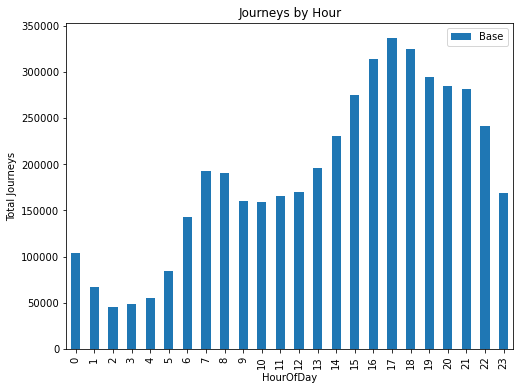

In [8]:
uber_hour = uber_data.pivot_table(index=['HourOfDay'],
                                  values='Base',
                                  aggfunc='count')
uber_hour.plot(kind='bar', figsize=(8,6))
plt.ylabel('Total Journeys')
plt.title('Journeys by Hour');

# Visualization on a Journeys in each Month (June - Dec' 14)

<AxesSubplot:xlabel='Month_name', ylabel='Total_Journeys'>

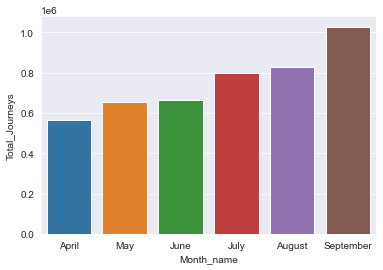

In [9]:
uber_monthly = uber_data.pivot_table(index=['Month_name', 'Month_no.'], values='Base',
aggfunc='count').sort_values('Month_no.').reset_index().rename(columns={"Base": "Total_Journeys"})

sns.set_style('darkgrid')
sns.barplot(data=uber_monthly, x="Month_name", y ="Total_Journeys")

# Visualization on a Map

In [10]:
uber_location = uber_data[['Lat', 'Lon']].round({"Lat":3, "Lon":3})
duplicate_locations = uber_location[uber_location.duplicated()]
uber_location_count = duplicate_locations.groupby(['Lat', 'Lon']).size().rename('count').to_frame().reset_index()

base=folium.Map(location=[40.8, -73.6], zoom_start=8)
HeatMap(uber_location_count, radius=15).add_to(base)
base

# Top 5 pickup locations

In [11]:
uber_top5 = uber_location_count.nlargest(5, 'count')
uber_top5 = uber_top5.reset_index()

m = folium.Map(location=[40.7, -73.9], tiles="OpenStreetMap", zoom_start=11)

for i in range(0,len(uber_top5)):
    folium.Marker(
       location=[uber_top5.iloc[i]['Lat'], uber_top5.iloc[i]['Lon']],
       popup=uber_top5.iloc[i],
    ).add_to(m)
    
m

# Visualization of Journeys by Month by Dispatch Base 

Text(0.5, 1.0, 'Journeys by Month by Dispatch Base')

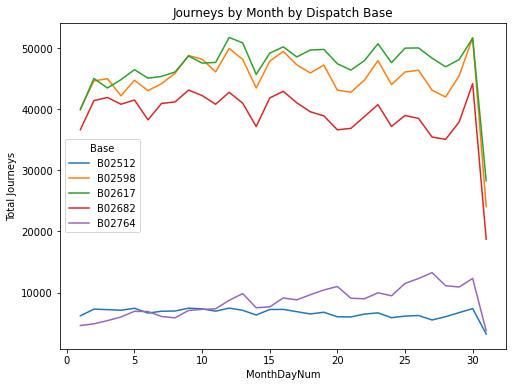

In [11]:
uber_data.groupby(['Base','MonthDayNum']).count().unstack('Base')['Date/Time'].plot(figsize = (8,6))
plt.ylabel('Total Journeys')
plt.title('Journeys by Month by Dispatch Base')